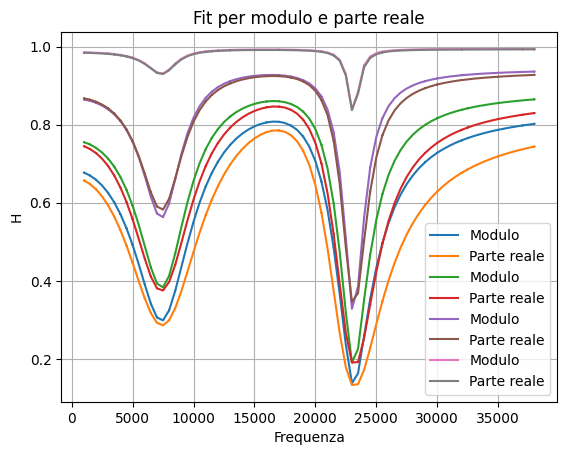

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


L1 = 4.576E-3
L2 = 481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
R = (329.84, 470.53, 997.90, 9970.9)
RL1 = 78.0
RL2 = 2.5

# Definisci le funzioni per il modulo e la parte reale
def module(f, L1, C1, L2, C2, RL1, RL2, R):

    W =  2 * f * np.pi 
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
     
    B1 = R + RL1 / ( A1**2 + D1**2 ) + RL2 / ( A2**2 + D2**2)
    B2 = ( A1 * W * L1 - RL1 * D1 )/( A1**2 + D1**2 ) + ( A2 * W * L2 - RL2 * D2 )/( A2**2 + D2**2)
    H = R / np.sqrt( B1**2+ B2**2 )
    
    return H * (R - 50)/ R
    

def real_part(f, L1, C1, L2, C2, RL1, RL2, R):
        
    W =  2 * f * np.pi 
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
     
    B1 = R + RL1 / ( A1**2 + D1**2 ) + RL2 / ( A2**2 + D2**2)
    B2 = ( A1 * W * L1 - RL1 * D1 )/( A1**2 + D1**2 ) + ( A2 * W * L2 - RL2 * D2 )/( A2**2 + D2**2)    
    H = R * B1 / ( B1**2 + B2**2 )
    
    return H * (R - 60)/ R


# Lista per memorizzare i parametri dei fit per ciascun file
params_list = []

# Definisci i limiti per i parametri del fit
bounds_list = [
    ( [L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[0] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[0] + 10]),    
    ( [L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[1] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[1] + 10]),    
    ( [L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[2] - 100], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[2] + 100]),    
    ( [L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[3] - 1000], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[3] + 1000]),                                                                  
]

# Itera attraverso i file e i limiti di resistenza
for file_name, bounds, R_val in zip(['notch_R1.txt', 'notch_R2.txt', 'notch_R3.txt', 'notch_R4.txt'], bounds_list, R):
    # Apri il file in modalità di lettura
    with open(file_name, 'r') as file:
        # Leggi tutte le righe del file
        lines = file.readlines()
    
    # Inizializza le liste per memorizzare i dati
    x_values = []
    y_values = []
    
    # Itera attraverso le righe e estra i dati
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))
    
    # Esegui il fit per il modulo
    params_mod, _ = curve_fit(module, x_values, y_values, bounds=bounds, maxfev=70000)
    
    # Esegui il fit per la parte reale
    params_real, _ = curve_fit(real_part, x_values, y_values, bounds=bounds, maxfev=70000)
    
    # Aggiungi i parametri dei fit alla lista
    params_list.append((params_mod, params_real))
    
 

# Plot dei dati sperimentali e dei fit
plt.figure()

# Itera attraverso i risultati dei fit
for params_mod, params_real in params_list:
    
    # Converti x_values in un array NumPy
    x_values_array = np.array(x_values)
    
    # Calcola i valori predetti per il modulo e la parte reale
    y_mod = module(x_values_array, *params_mod)
    y_real = real_part(x_values_array, *params_real)
    
    # Traccia il modulo
    plt.plot(x_values, y_mod, label='Modulo')
    
    # Traccia la parte reale
    plt.plot(x_values, y_real, label='Parte reale')

plt.xlabel('Frequenza')
plt.ylabel('H')
plt.title('Fit per modulo e parte reale')
plt.legend()
plt.grid()
plt.show()


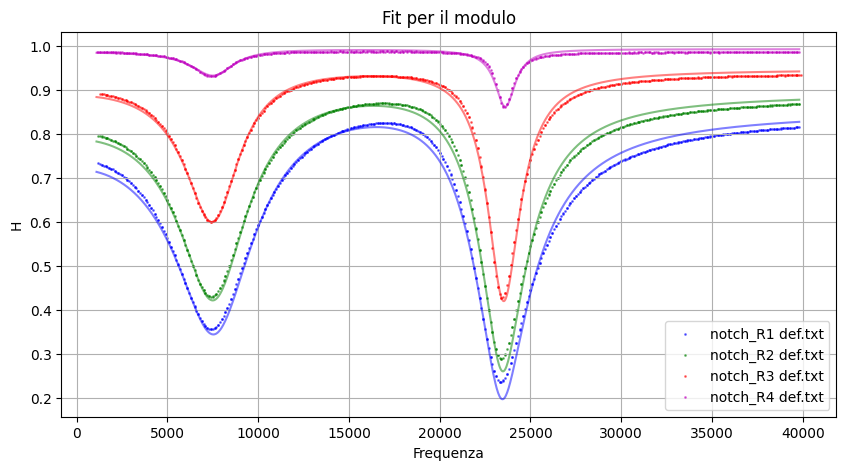

[array([4.05263192e-03, 1.05066187e-07, 4.53168354e-04, 1.01703563e-07,
       7.03517136e+01, 3.47116345e+00, 3.86603850e+02]), array([4.10273120e-03, 1.04751742e-07, 4.53442210e-04, 1.01392414e-07,
       6.89695644e+01, 3.49335907e+00, 5.28997929e+02]), array([4.22572059e-03, 1.02221816e-07, 4.55285756e-04, 1.00542686e-07,
       6.98021291e+01, 3.40675706e+00, 1.06361608e+03]), array([3.93562331e-03, 1.07401418e-07, 4.58160890e-04, 9.90743464e-08,
       6.80000000e+01, 3.50000000e+00, 8.71031452e+03])]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dati forniti
L1 = 4.576E-3  #4576
L2 = 481.5E-6 #481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
# R = (329.84, 470.53, 997.90, 9970.9) 

R = (379.84, 520.53, 1057.90, 10020.9) 

RL1 = 78.0
RL2 = 2.5

# Definizione delle funzioni per il modulo e la parte reale
def module(f, L1, C1, L2, C2, RL1, RL2, R):
    # Implementazione della funzione di modulo
    W = 2 * np.pi * f
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
    B1 = R + RL1 / (A1**2 + D1**2) + RL2 / (A2**2 + D2**2)
    B2 = (A1 * W * L1 - RL1 * D1) / (A1**2 + D1**2) + (A2 * W * L2 - RL2 * D2) / (A2**2 + D2**2)
    H = R / np.sqrt(B1**2 + B2**2)
    return H *(R-55)/R

# def real_part(f, L1, C1, L2, C2, RL1, RL2, R):
#     # Implementazione della funzione per la parte reale
#     W = 2 * np.pi * f
#     A1 = 1 - W**2 * L1 * C1
#     A2 = 1 - W**2 * L2 * C2
#     D1 = W * RL1 * C1
#     D2 = W * RL2 * C2
#     B1 = R + RL1 / (A1**2 + D1**2) + RL2 / (A2**2 + D2**2)
#     B2 = (A1 * W * L1 - RL1 * D1) / (A1**2 + D1**2) + (A2 * W * L2 - RL2 * D2) / (A2**2 + D2**2)
#     H = R * B1 / (B1**2 + B2**2)
#     return H * (R - 50) / R

# Lista per memorizzare i parametri dei fit per ciascun file
params_list_mod = []
params_list_real = []

# Definizione dei limiti per i parametri del fit
# bounds_list = [
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[0] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[0] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[1] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[1] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[2] - 100], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[2] + 100]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[3] - 1000], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[3] + 1000]),
# ]

bounds_list = [
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[0] - 100], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[0] + 100]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[1] - 100], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[1] + 100]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[2] - 1000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[2] + 1000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[3] - 10000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[3
                                                                                                                                                      ] + 10000]),
]

# Iterazione attraverso i file e i limiti di resistenza
for file_name, bounds in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt'], bounds_list):
    # Apertura del file in modalità di lettura
    with open(file_name, 'r') as file:
        # Lettura di tutte le righe del file
        lines = file.readlines()

    # Inizializzazione delle liste per memorizzare i dati
    x_values = []
    y_values = []

    # Iterazione attraverso le righe ed estrazione dei dati
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

    # Esecuzione del fit per il modulo
    params_mod, _ = curve_fit(module, x_values, y_values, bounds=bounds, maxfev=70000)
    params_list_mod.append(params_mod)

    # # Esecuzione del fit per la parte reale
    # params_real, _ = curve_fit(real_part, x_values, y_values, bounds=bounds, maxfev=70000)
    # params_list_real.append(params_real)

# Plot dei dati sperimentali e dei fit per il modulo
plt.figure(figsize=(10, 5))
plt.title('Fit per il modulo')
plt.xlabel('Frequenza')
plt.ylabel('H')

for params_mod, color in zip(params_list_mod, ['b', 'g', 'r', 'm']):
    x_fit = np.linspace(min(x_values), max(x_values), 1000)
    y_mod_fit = module(x_fit, *params_mod)
    plt.plot(x_fit, y_mod_fit, linestyle='-', color=color, alpha=0.5)
    

for file_name, color in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt'], ['b', 'g', 'r', 'm']):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    x_values = []
    y_values = []
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))
    plt.scatter(x_values, y_values, label=file_name, s=1, color=color, alpha= 0.5)

plt.legend()
plt.grid()
plt.show()
print (params_list_mod)

# # Plot dei dati sperimentali e dei fit per la parte reale
# plt.figure(figsize=(10, 5))
# plt.title('Fit per la parte reale')
# plt.xlabel('Frequenza')
# plt.ylabel('H')

# for params_real, color in zip(params_list_mod, ['b', 'g', 'r', 'm']):
#     x_fit = np.linspace(min(x_values), max(x_values), 1000)
#     y_real_fit = real_part(x_fit, *params_real)
#     plt.plot(x_fit, y_real_fit, linestyle='-', color=color, alpha=0.5)
    

# for file_name, color in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt'], ['b', 'g', 'r', 'm']):
#     with open(file_name, 'r') as file:
#         lines = file.readlines()
#     x_values = []
#     y_values = []
#     for line in lines:
#         parts = line.split()
#         x_values.append(float(parts[0]))
#         y_values.append(float(parts[1]))
#     plt.scatter(x_values, y_values, label=file_name, s= 1, color=color)

# plt.legend()
# plt.grid()
# plt.show()
# print (params_list_real)
